In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('Google_Stock_Price_Train.csv')

In [4]:
training_set=df1.iloc[:,1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))


In [6]:
training_set=sc.fit_transform(training_set)

In [8]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(training_set[i-60:i,0])
    y_train.append(training_set[i,0])

In [9]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [12]:
x_train.shape

(1198, 60, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
rgr=Sequential()

In [17]:
rgr.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
rgr.add(Dropout(0.2))

In [18]:
rgr.add(LSTM(units=50,return_sequences=True))
rgr.add(Dropout(0.2))

In [19]:
rgr.add(LSTM(units=50,return_sequences=True))
rgr.add(Dropout(0.2))

In [21]:
rgr.add(LSTM(units=50))
rgr.add(Dropout(0.2))

In [22]:
rgr.add(Dense(units=1))

In [67]:
rgr.compile(optimizer='adam',loss='mean_squared_error')

In [68]:
rgr.fit(x_train,y_train,epochs=200,batch_size=32)

Epoch 1/200
38/38 [==============================] - 7s 60ms/step - loss: 0.0011
Epoch 2/200
38/38 [==============================] - 2s 63ms/step - loss: 9.4584e-04
Epoch 3/200
38/38 [==============================] - 3s 68ms/step - loss: 9.8238e-04
Epoch 4/200
38/38 [==============================] - 3s 72ms/step - loss: 9.7140e-04
Epoch 5/200
38/38 [==============================] - 3s 66ms/step - loss: 8.6992e-04: 0s - loss: 8.6992e-0
Epoch 6/200
38/38 [==============================] - 3s 68ms/step - loss: 0.0011
Epoch 7/200
38/38 [==============================] - 3s 69ms/step - loss: 9.2479e-04
Epoch 8/200
38/38 [==============================] - 3s 69ms/step - loss: 0.0010
Epoch 9/200
38/38 [==============================] - 3s 75ms/step - loss: 9.5534e-04
Epoch 10/200
38/38 [==============================] - 3s 77ms/step - loss: 0.0011
Epoch 11/200
38/38 [==============================] - 3s 72ms/step - loss: 9.3251e-04
Epoch 12/200
38/38 [==============================] - 3s 

38/38 [==============================] - 3s 80ms/step - loss: 8.3633e-04
Epoch 97/200
38/38 [==============================] - 3s 77ms/step - loss: 9.0146e-04
Epoch 98/200
38/38 [==============================] - 3s 90ms/step - loss: 8.6522e-04
Epoch 99/200
38/38 [==============================] - 3s 88ms/step - loss: 8.2964e-04
Epoch 100/200
38/38 [==============================] - 3s 77ms/step - loss: 7.7191e-04
Epoch 101/200
38/38 [==============================] - 3s 78ms/step - loss: 8.9752e-04
Epoch 102/200
38/38 [==============================] - 3s 77ms/step - loss: 8.4693e-04
Epoch 103/200
38/38 [==============================] - 3s 83ms/step - loss: 9.4060e-04
Epoch 104/200
38/38 [==============================] - 3s 85ms/step - loss: 9.3999e-04
Epoch 105/200
38/38 [==============================] - 3s 78ms/step - loss: 8.5480e-04
Epoch 106/200
38/38 [==============================] - 3s 76ms/step - loss: 8.0521e-04
Epoch 107/200
38/38 [==============================] - 3s 77

38/38 [==============================] - 3s 89ms/step - loss: 8.3014e-04
Epoch 191/200
38/38 [==============================] - 3s 85ms/step - loss: 8.2816e-04
Epoch 192/200
38/38 [==============================] - 3s 79ms/step - loss: 8.1877e-04
Epoch 193/200
38/38 [==============================] - 3s 80ms/step - loss: 8.4293e-04
Epoch 194/200
38/38 [==============================] - 3s 80ms/step - loss: 7.5110e-04
Epoch 195/200
38/38 [==============================] - 3s 87ms/step - loss: 7.5244e-04
Epoch 196/200
38/38 [==============================] - 3s 84ms/step - loss: 7.7810e-04
Epoch 197/200
38/38 [==============================] - 3s 79ms/step - loss: 8.1672e-04
Epoch 198/200
38/38 [==============================] - 3s 80ms/step - loss: 8.5289e-04
Epoch 199/200
38/38 [==============================] - 3s 80ms/step - loss: 7.7664e-04
Epoch 200/200
38/38 [==============================] - 3s 85ms/step - loss: 8.0140e-04


In [69]:
df2=pd.read_csv('Google_Stock_Price_Test.csv')

In [70]:
df3=pd.concat((df1['Open'],df2['Open']),axis=0)

In [71]:
inputs=df3[len(df3)-len(df2)-60:].values

In [72]:
inputs=inputs.reshape(-1,1)

In [73]:
inputs=sc.transform(inputs)

In [74]:
x_test=[]

In [75]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])

In [76]:
len(x_test)

20

In [77]:
x_test=np.array(x_test)

In [78]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [79]:
x_test.shape

(20, 60, 1)

In [80]:
pdr=rgr.predict(x_test)

In [81]:
pdr=sc.inverse_transform(pdr)

In [82]:
rdr=df2.iloc[:,1:2].values

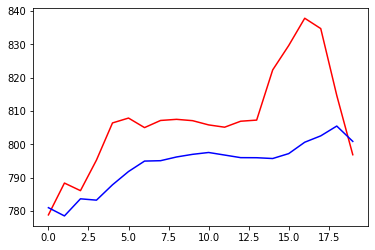

In [83]:
plt.plot(rdr,color='red')
plt.plot(pdr,color='blue')
plt.show()